

# **Project Name: Parameter setting and reliability test of a sensor system for person detection in a car wearing summer wear.**

## **First running summer wear image of our Data set** 

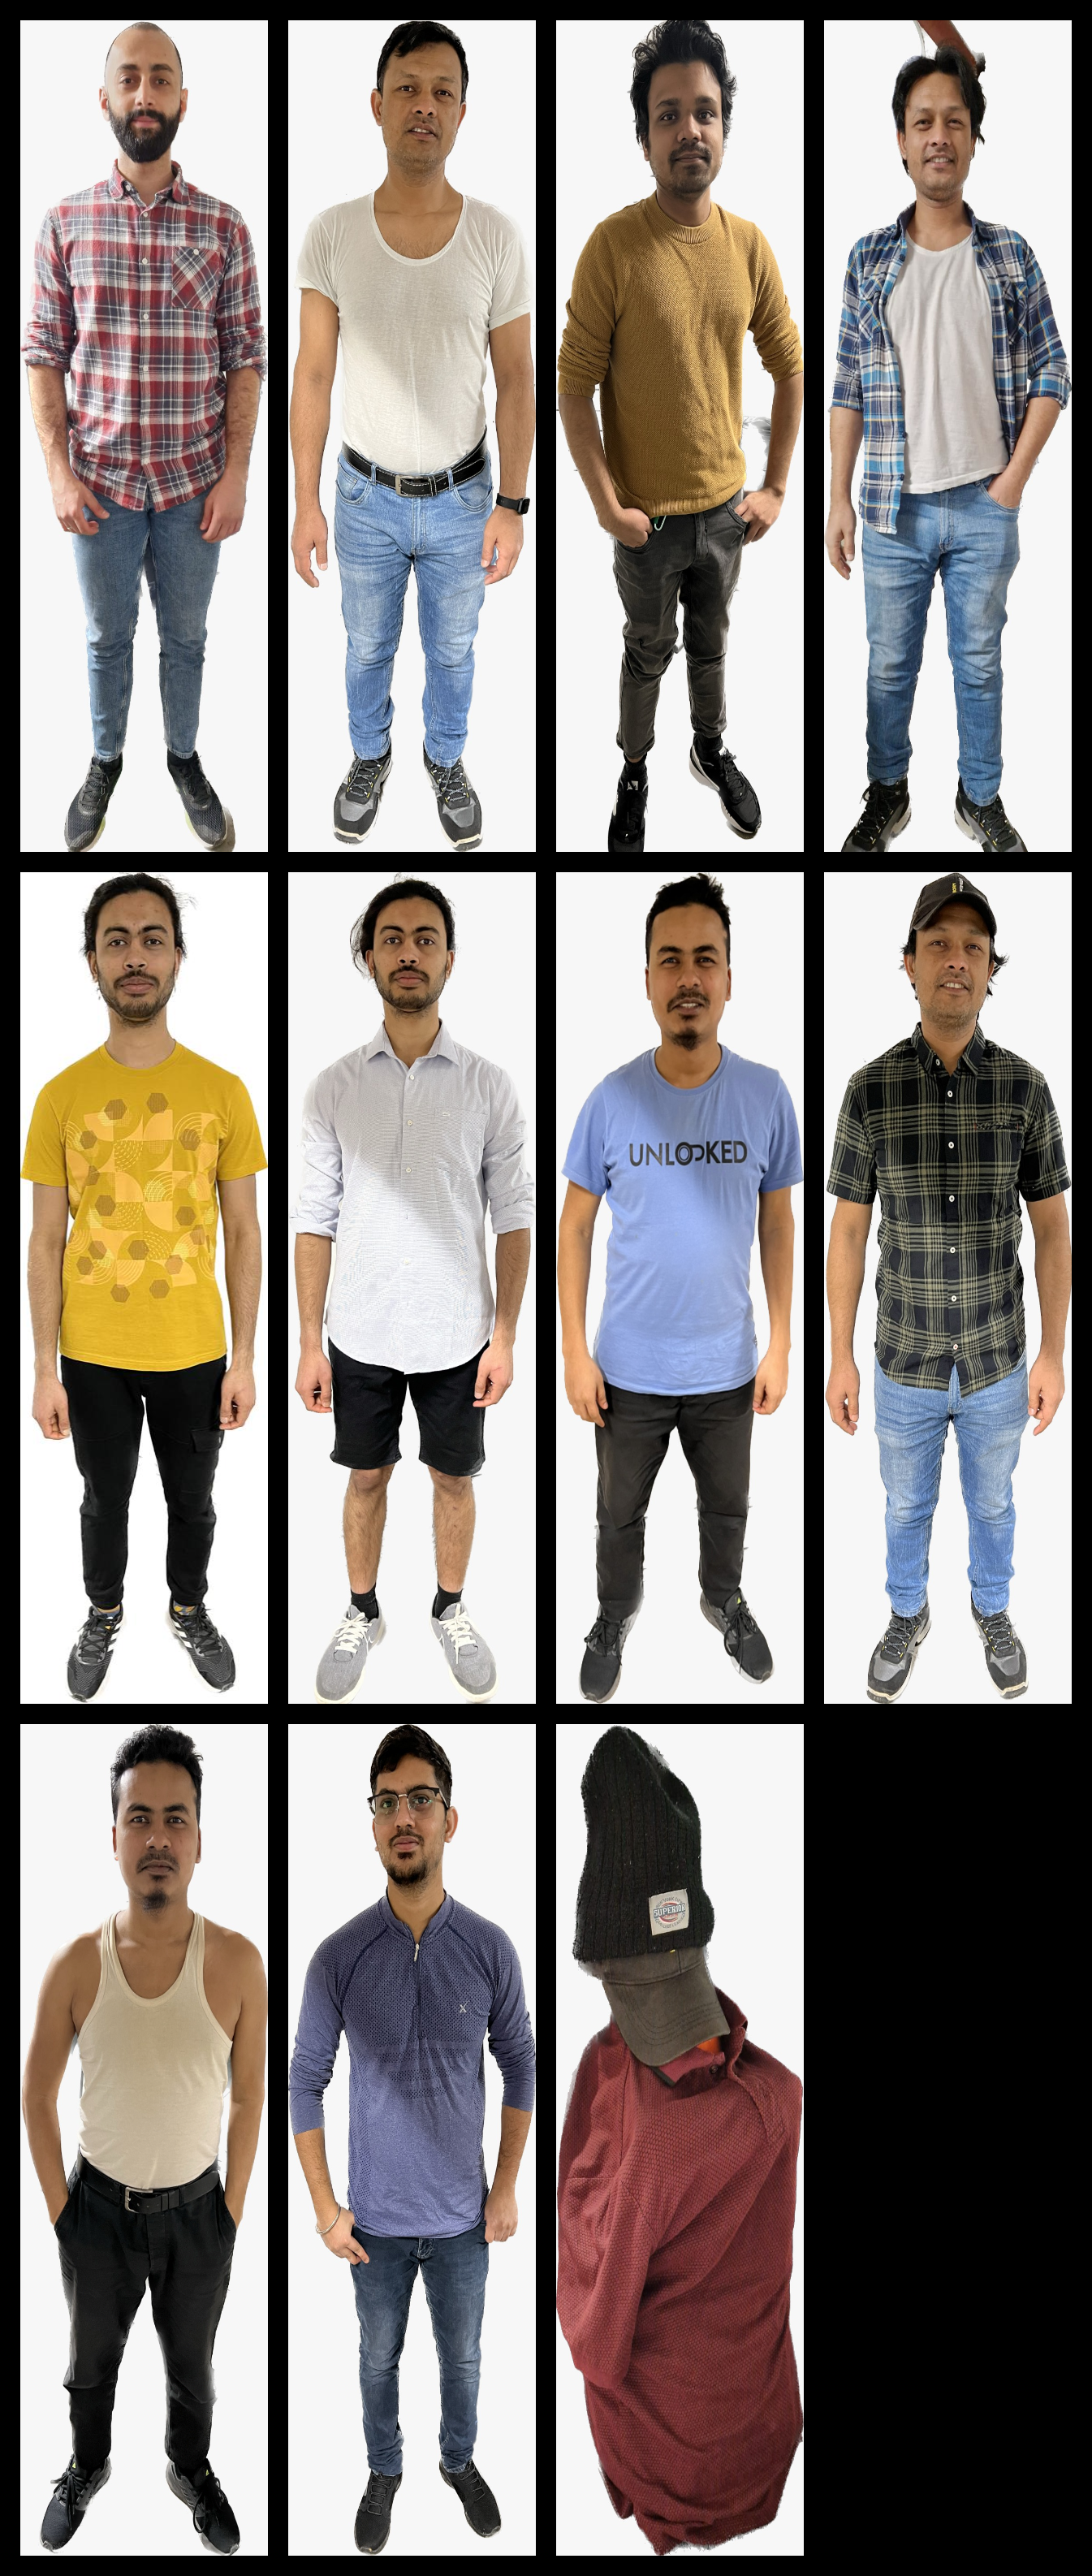

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as T
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes, make_grid

folder_path = '/content/drive/MyDrive/Imagedata/select_image'

images =[]
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    file_ext = os.path.splitext(file_name)[1]
   
    
    if file_ext in ['.jpg', '.jpeg', '.png', '.GIF','.bmf']:
        img = read_image(file_path)
        transform = T.Resize((1024,305))
        image = transform(img)
        images.append(image)

    else:
        continue
Grid = make_grid(images, nrow=4, padding=25)
imag= torchvision.transforms.ToPILImage()(Grid)
imag.show()

**Drawing bounding box inside the image to Identify summer wear**

/usr/local/lib/python3.9/dist-packages/torchvision/utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


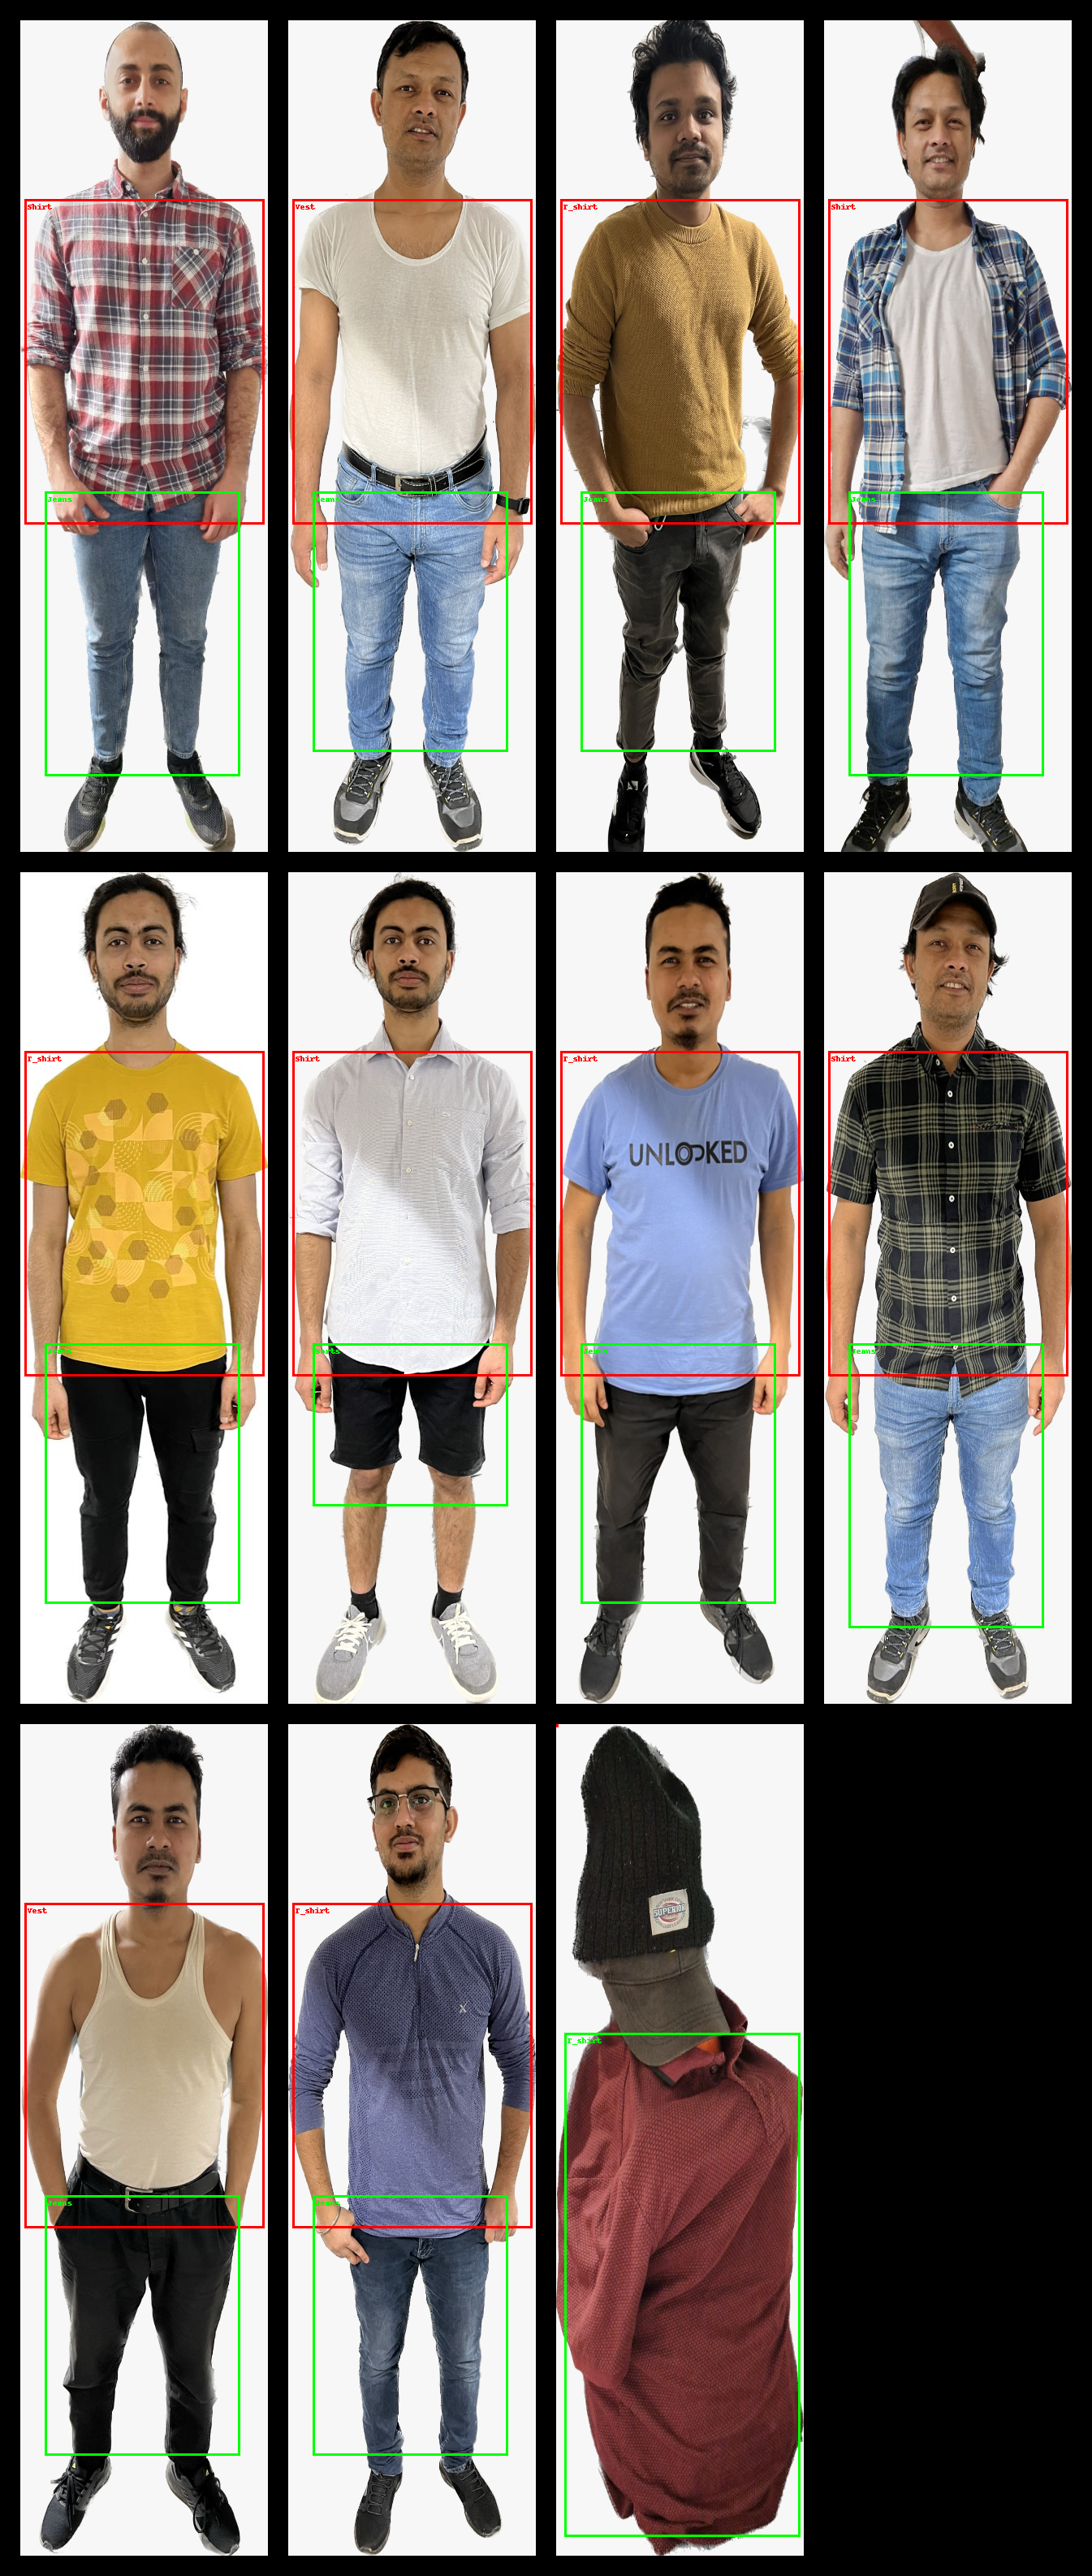

In [ ]:
T_shirt=0
Shirt=0
Jeans=0
Sorts=0
Vest=0
Dummy=0
Jacket=0
Total_Image=0

images =[]

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    file_ext = os.path.splitext(file_name)[1]
    
    if file_ext in ['.jpg', '.jpeg', '.png','.GIF','.bmf']:
      img = read_image(file_path)
      transform = T.Resize((1024,305))
      image = transform(img)

# bounding box in (xmin, ymin, xmax, ymax) format
      if file_ext =='.jpeg':
        bbox1 = [5, 220, 300, 620]
        bbox2 = [30, 580, 270, 900]
        labels = ['T_shirt', 'Jeans']
        T_shirt+=1
        Jeans+=1

      elif file_ext == '.jpg':
        bbox1 = [5, 220, 300, 620]
        bbox2 = [30, 580, 270, 930]
        labels = ['Shirt', 'Jeans']
        Shirt+=1
        Jeans+=1

      elif file_ext == '.png':
        bbox1 = [5, 220, 300, 620]
        bbox2 = [30, 580, 270, 900]
        labels = ['Vest', 'Jeans']
        Vest+=1
        Jeans+=1

      elif file_ext == '.GIF':
        bbox1 = [5, 220, 300, 620]
        bbox2 = [30, 580, 270, 780]
        labels = ['Shirt', 'Sorts']
        Shirt+=1
        Sorts+=1 

      else:
        bbox1 = [0, 0, 0, 0]
        bbox2 = [10, 380, 300, 1000]
        labels = ['','T_shirt']
        Dummy+=1

      bbox = [bbox1,bbox2]
      bbox = torch.tensor(bbox, dtype=torch.int)
      image=draw_bounding_boxes(image, bbox,width=3,labels= labels,colors=[(255,0,0),(0,255,0)],font_size=20)
      images.append(image)
      Total_Image+=1

    
Grid = make_grid(images, nrow=4, padding=25)
imag= torchvision.transforms.ToPILImage()(Grid)
imag.show()

 **Counting different types of cloths and drawing vartical var of this cloths**

T_shirt =  4 
Shirt   =  4 
Jeans   =  9 
Sorts   =  1 
Vest    =  2 
Dummy   =  1 




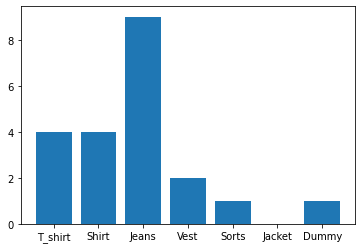

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

T_shirt
Shirt
Jeans
Vest
Sorts
Dummy

print("T_shirt = ", T_shirt, "\nShirt   = ", Shirt, "\nJeans   = ", Jeans, "\nSorts   = ", Sorts, "\nVest    = ", Vest, "\nDummy   = " ,Dummy, "\n\n")

x = np.array(["T_shirt", "Shirt", "Jeans","Vest", "Sorts","Jacket", "Dummy"])
y = np.array([T_shirt,Shirt,Jeans,Vest,Sorts,Jacket,Dummy])

plt.bar(x,y)
plt.show()

In [ ]:
Total_Image
Human = Total_Image-Dummy
print("Total Human = ", Human)

Total Human =  10


**Import Initial packege to run ML project with Random Forest Classifier**

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
import seaborn as sns  
! pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Extract data of rar file**

In [206]:
#****If dataset is rar then first run this before load dataset, otherwise no need to run***
import os
!pip install rarfile
import rarfile
os.chdir('/content/drive/MyDrive/Machine Learning Dataset')
with rarfile.RarFile('10 person adc_ 2nd_time.rar', 'r') as rf:
    rf.extractall()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Upload FFT or ADC data file**

In [27]:
File_name= '10fft.txt' # only change file name

# label the data and remove the unwanted row and column
cols = list(pd.read_csv(File_name, skiprows=[0], nrows =1,delimiter="\t"))
df = pd.read_csv(File_name, skiprows=[0],usecols =[i for i in cols if i != 'V0.2'], delimiter="\t") 
df.fillna(0, inplace=True) # fill any missing values (NaNs) with 0


## **Feature Extruction of dataset**

In [28]:
# compute the mean, standard deviation, skewness, and kurtosis of the FFT data
mean = df.mean().values[0]
std_dev = df.std().values[0]
skewness = skew(df.values.flatten())
kurtosis = kurtosis(df.values.flatten())

# find the peaks in the FFT data and compute their frequencies
peaks,_ = find_peaks(df.values.flatten())
num_peaks = len(peaks)
num_peaks = len(peaks)
frequencies = np.fft.fftfreq(len(df))
peak_frequencies = peaks / len(df)

# compute the dominant frequency of the FFT data
dominant_frequency = peaks[0] / len(df)

# compute the spectrum of the FFT data
spectrum = np.fft.fft(df.values.flatten())

# compute the spectral entropy of the FFT data
spectral_entropy = -np.sum(np.square(df) * np.log(np.square(df)))

# compute the total energy of the FFT data
total_energy = np.sum(np.square(df.values.flatten()))

# compute the spectral centroid of the FFT data
spectral_centroid = np.sum(np.multiply(np.abs(df), np.arange(len(df))[np.newaxis].T), axis=1)

# create a feature vector from the extracted features
low_energy_range = df.iloc[:10].values.flatten()
low_energy_ratio = np.sum(np.square(low_energy_range)) / total_energy

feature_vector = [mean, std_dev, skewness, kurtosis, num_peaks, dominant_frequency, total_energy, low_energy_ratio, spectral_centroid]


# print the extracted features
print(f'Mean: {mean:.2f}')
print(f'Standard deviation: {std_dev:.2f}')
print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')
print(f'Frequencies: {frequencies}')
print(f'Peak frequencies: {peak_frequencies}')
print(f'Dominant frequency: {dominant_frequency}')
print(f'Spectrum: {spectrum}')
print(f'Spectral entropy: {spectral_entropy}')
print(f'Total energy: {total_energy:.2f}')
print(f'Spectral_Centroid: {spectral_centroid}')
print(f'Feature vector: {feature_vector}')


/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Mean: 64.00
Standard deviation: 0.00
Skewness: 9.85
Kurtosis: 95.01
Frequencies: [ 0.00000000e+00  9.99700090e-05  1.99940018e-04 ... -2.99910027e-04
 -1.99940018e-04 -9.99700090e-05]
Peak frequencies: [9.99700090e-05 3.99880036e-04 5.99820054e-04 ... 9.99991003e+01
 9.99993002e+01 9.99996001e+01]
Dominant frequency: 9.997000899730081e-05
Spectrum: [ 1.97486195e+10+7.33416528e-07j -9.09682248e+06+1.12961571e+07j
  1.04478567e+07-2.04653080e+07j ...  2.38814899e+06-7.13841140e+06j
  1.04478567e+07+2.04653080e+07j -9.09682248e+06-1.12961571e+07j]
Spectral entropy: 64     -3.407979e+08
170    -2.969382e+09
1      -3.879961e+04
2      -5.546841e+04
119    -1.353949e+09
            ...     
91     -2.029717e+09
73     -1.958880e+09
82.3   -1.870593e+09
69     -1.785190e+09
67     -1.692411e+09
Length: 100, dtype: float64
Total energy: 38158700774020992.00
Spectral_Centroid: 0        0.000000e+00
1        1.968928e+06
2        3.959390e+06
3        5.935122e+06
4        7.926924e+06
        

**Creating Target and Predicted Column**

In [15]:

df['Target'] = 2 # Creating a traget column with respect the usecase.
df.rename(columns = {'1':'Predicted'}, inplace = True)#label the data.For FFT data use 1 and ADC data use 2

# Preprocessing the data
X = df.drop(['Predicted'],axis=1).values
y = df.Predicted

**Split the data into Training and Testing set**

In [16]:
# Split the data into training and validation sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.1, random_state=42)

**Initiate Random Forest Classifier**

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier on training data
clf.fit(X_train, y_train)

# make predictions on test data
pred = clf.predict(X_test)

#Generate the confusion matrix
cm = confusion_matrix(y_test, pred, labels=[1,2]) # when fft use [1,2] and  for adc use [2,1]
print(cm)

[[162  66]
 [  7 765]]


**Display the visualization of the Confusion Matrix**

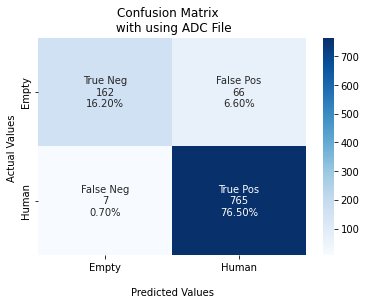

In [18]:
 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix  \n with using ADC File');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Empty', 'Human'])
ax.yaxis.set_ticklabels(['Empty', 'Human'])
plt.show()

**Display the Classification report and Validation accuracy**

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
Validation_accuracy_Percentage = acc*100
print(classification_report(y_test, pred))
print(f"Validation accuracy: {Validation_accuracy_Percentage:.2f} %")


              precision    recall  f1-score   support

           1       0.92      0.99      0.95       772
           2       0.96      0.71      0.82       228

    accuracy                           0.93      1000
   macro avg       0.94      0.85      0.89      1000
weighted avg       0.93      0.93      0.92      1000

Validation accuracy: 92.70 %


**Evaluate TPR, TNR, FPR, FNR, PPV, NPV, FDR**

In [11]:

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR: '+str(TPR))
print('TNR: '+str(TNR))
print('PPV: '+str(PPV))
print('NPV: '+str(NPV))
print('FPR: '+str(FPR*100))
print('FNR: '+str(FNR*100))
print('FDR: '+str(FDR))
print('ACC: '+str(ACC))

TPR: [0.77336449 0.9493007 ]
TNR: [0.9493007  0.77336449]
PPV: [0.91944444 0.8484375 ]
NPV: [0.8484375  0.91944444]
FPR: [ 5.06993007 22.6635514 ]
FNR: [22.6635514   5.06993007]
FDR: [0.08055556 0.1515625 ]
ACC: [0.874 0.874]


**Display figure of the training and validation accuracies**

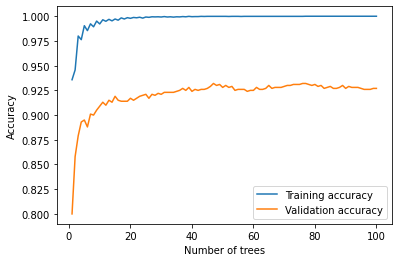

In [20]:
# Initialize lists to store the training and validation accuracies
train_accs = []
val_accs = []

# Train the classifier for different numbers of trees and store the accuracies
for n_trees in range(1, 101):
    clf.set_params(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_test, clf.predict(X_test))
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracies
plt.plot(range(1, 101), train_accs, label='Training accuracy')
plt.plot(range(1, 101), val_accs, label='Validation accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Display the Mean and difference of Traing and validation Accuracy**

In [21]:
mean_train_accs=np.mean(train_accs)
mean_val_accs= np.mean(val_accs)
diff_btn_train_val_accs= abs(mean_train_accs- mean_val_accs)


print(f'Average Traing Accuracy = {mean_train_accs}')
print(f'Average Validation Accuracy = {mean_val_accs}')
print(f'Difference Between Traing and Validation Accuracy = {diff_btn_train_val_accs:.2f} or {diff_btn_train_val_accs*100:.2f}%')

Average Traing Accuracy = 0.9973127361635921
Average Validation Accuracy = 0.9209400000000002
Difference Between Traing and Validation Accuracy = 0.08 or 7.64%


**Diplay figure of the training and validation errors**

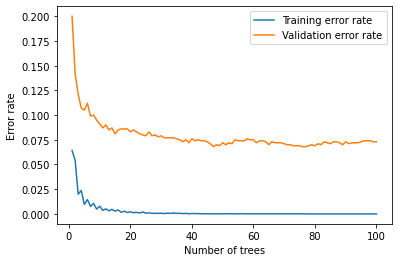

In [24]:

# Initialize lists to store the training and validation error rates
train_errs = []
val_errs = []

# Train the classifier for different numbers of trees and store the error rates
for n_trees in range(1, 101):
    clf.set_params(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    train_err = 1 - accuracy_score(y_train, clf.predict(X_train))
    val_err = 1 - accuracy_score(y_test, clf.predict(X_test))
    train_errs.append(train_err)
    val_errs.append(val_err)

# Plot the training and validation error rates
plt.plot(range(1, 101), train_errs, label='Training error rate')
plt.plot(range(1, 101), val_errs, label='Validation error rate')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.legend()
plt.show()

**Display the Mean and difference of Traing and validation Errors**

In [25]:
mean_train_errs=np.mean(train_errs)
mean_val_errs= np.mean(val_errs)
diff_btn_train_val_errs= abs(mean_train_errs- mean_val_errs)

print(f'Average Traing Errors = {mean_train_errs}')
print(f'Average Validation Errors = {mean_val_errs}')
print(f'Difference Between Traing and Validation Errors = {diff_btn_train_val_errs:.2f} or {diff_btn_train_val_errs*100:.2f}%')

Average Traing Errors = 0.002687263836408079
Average Validation Errors = 0.07905999999999995
Difference Between Traing and Validation Errors = 0.08 or 7.64%
